Analytics & Data Science

Universidad de Antioquia - ML2

Febrero 2024

Melissa Ortega Alzate CC.1036964792

# Packages

In [418]:
# system
import os

# Data manipulation
import cv2
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.metrics import accuracy_score

# Warnings ignoring
import warnings
warnings.filterwarnings("ignore")

# 1. Simulate any random rectangular matrix A...

In [419]:
# Generate and print matrix A
A = np.random.rand(3,5)
A

array([[0.94434078, 0.54773296, 0.6039575 , 0.75828709, 0.89390736],
       [0.68166487, 0.7836156 , 0.0487756 , 0.16446454, 0.98181658],
       [0.3232612 , 0.36746453, 0.07915642, 0.29866542, 0.50916537]])

In [420]:
# 1.1  What is the rank and trace of A?
print(f'The rank of A matrix is: ', np.linalg.matrix_rank(A))
print(f'The trace of A matrix is: ', round(np.trace(A), 3))

The rank of A matrix is:  3
The trace of A matrix is:  1.807


* The rank of a matrix is the maximum number of linearly independent vectors that can be obtained from the matrix.

* The trace of a matrix is the sum of the elements on its main diagonal. For rectangular matrices, it is the trace of a square matrix formed by the multiplication of the original rectangular matrix by its transpose:

* tr(A) = tr(A^T A)

* Note: the trace of a matrix is equal to the sum of its eigenvalues.

In [421]:
# 1.2 What is the determinant of A?
# print(f'The determinant of A matrix is: ', np.linalg.det(A))

print('LinAlgError: Last 2 dimensions of the array must be square')

LinAlgError: Last 2 dimensions of the array must be square


The determinant is a measure that specifically applies to *square matrices* and does not have a direct or unique definition for rectangular matrices. Calculating the determinant involves certain specific properties of square matrices, such as the existence of a unique inverse matrix. These properties do not apply to rectangular matrices, as they are not square and therefore cannot have an inverse.

In [422]:
# 1.3 Can you invert A? How?

# print(f'The inverse of A matrix is: \n', np.linalg.inv(A))
A_pseudoinverse = np.linalg.pinv(A)
print(f'The pseudo-inverse of A matrix is: \n\n', A_pseudoinverse)

The pseudo-inverse of A matrix is: 

 [[ 1.10542511  1.22912436 -3.95014434]
 [-0.47510247  0.44475812  0.81229515]
 [ 1.28296119  0.21927519 -2.92680649]
 [-0.25380282 -2.23044429  5.01358442]
 [-0.40951375  0.17290748  1.39980051]]


- A rectangular matrix does not possess the property of invertibility. The inverse of a square matrix is a matrix such that when multiplied by A, the identity matrix I is obtained. Therefore, it is not possible to use np.linalg.inv(A), but instead, the method np.linalg.pinv(A) is used to calculate the pseudoinverse A+. "This can be useful in situations where you need to work with overdetermined or underdetermined systems, where the matrix is not invertible but an approximation of its inverse is obtained."

- However, implementing this latter method entails computational loss. *Why?*

- A_pse = V @ S_pse @ U.T
- So, pinv calulate first U, S and Vt. Then S_pse which is a zero matrix transpose. Then reconstruct the pseudoinverse.

In [423]:
# Verify
A_pseudoinverse.dot(A)

array([[ 0.60482051,  0.11710085,  0.41490179, -0.13939456,  0.18364561],
       [ 0.11710085,  0.38677977, -0.20094999, -0.04451266,  0.42556586],
       [ 0.41490179, -0.20094999,  0.55387379,  0.13478   , -0.12809204],
       [-0.13939456, -0.04451266,  0.13478   ,  0.9380999 ,  0.13598017],
       [ 0.18364561,  0.42556586, -0.12809204,  0.13598017,  0.51642602]])

In [424]:
# 1.4 How are eigenvalues and eigenvectors of A’A and AA’ related?

# Calculating A'
A_transpose = np.transpose(A)
print(f'The transpose of A matrix is: \n\n', A_transpose)

The transpose of A matrix is: 

 [[0.94434078 0.68166487 0.3232612 ]
 [0.54773296 0.7836156  0.36746453]
 [0.6039575  0.0487756  0.07915642]
 [0.75828709 0.16446454 0.29866542]
 [0.89390736 0.98181658 0.50916537]]


In [425]:
# Printing A'A
A_transpose @ A

array([[1.46094431, 1.17019682, 0.62917851, 0.92473807, 1.67801645],
       [1.17019682, 1.04909498, 0.39811592, 0.65396476, 1.44608952],
       [0.62917851, 0.39811592, 0.37340946, 0.48963631, 0.62807445],
       [0.92473807, 0.65396476, 0.48963631, 0.69124893, 0.99138251],
       [1.67801645, 1.44608952, 0.62807445, 0.99138251, 2.02228353]])

In [426]:
# Printing AA'
A @ A_transpose

array([[2.93062524, 2.10475882, 1.23596908],
       [2.10475882, 2.07211184, 1.06119452],
       [1.23596908, 1.06119452, 0.59424413]])

In [427]:
# Calculate the eigenvalues and vectors of AA'
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(A @ A_transpose)

# Calculate the eigenvalues and vectors of A'A
eigenvaluesA_TA, eigenvectors_A_TA = np.linalg.eig(A_transpose @ A)

In [428]:
# Compare the results eigen values
print('The eigenvalues of A * A_T : \n', eigenvalues_AAT)
print('\nThe eigenvalues of A_T * A : \n', eigenvaluesA_TA)

The eigenvalues of A * A_T : 
 [5.22252432 0.35751456 0.01694233]

The eigenvalues of A_T * A : 
 [ 5.22252432e+00  3.57514562e-01  1.69423257e-02  4.92651942e-16
 -1.23585627e-17]


- Matrix AA': This matrix is obtained by multiplying A by its transpose. It contains information about how the rows of A are related to each other.
- Matrix A'A: This matrix is obtained by multiplying the transpose of A by A. It contains information about how the columns of A are related to each other.

When these two matrices are square, they are symmetric, and they have the same eigenvalues. Both matrices have the same non-negative eigenvalues ==> *Theorem of eigenvalues of symmetric matrices*, *Spectral theorem* for square matrices.

In [429]:
# Compare the results eigen values
print('The eigenvectors of A * A_T : \n', eigenvectors_AAT)
print('\nThe eigenvectors of A_T * A : \n', eigenvectors_A_TA)

The eigenvectors of A * A_T : 
 [[ 0.72889178  0.65931281 -0.18445429]
 [ 0.59877655 -0.7445439  -0.2951627 ]
 [ 0.33193887 -0.10469477  0.93747298]]

The eigenvectors of A_T * A : 
 [[-0.52675728 -0.13587452  0.5557746  -0.16356022  0.61769195]
 [-0.43339223  0.43614228 -0.09343904 -0.68594273 -0.3243253 ]
 [-0.21690974 -0.5913684   0.39636772  0.07269878 -0.66756995]
 [-0.32832913 -0.57905003 -0.70356304 -0.16663706  0.19692405]
 [-0.61631818  0.32604064 -0.17399834  0.68533029 -0.16982646]]


For a square matrix A, the eigenvectors of AA' and A'A are the same due to the property of matrix similarity. However, in the case of a rectangular matrix, they generally have different eigenvectors due to differences in the dimensions and structures of the matrices AA' and A'A.

* To calculate the eigenvalues and eigenvectors of matrix A, it must be square.
* Matrix A will have as many eigenvalues as the dimension of A.
* Eigenvalues can be repeated.
* These eigenvalues are what form the eigenvectors.

* ==> They are vectors that, even when a transformation is applied to the matrix, remain unchanged, and therefore, from these eigenvectors, the entire space or other vectors can be generated.

# 2. Add a steady, well-centered picture of your face...


In [430]:
# Reading the photo
my_original_face = cv2.imread("melissa_ortega_color.jpeg")

# Printing original photo features
print("==" * 5 + " Original photo " + "==" * 5)
print(f"The size of the photo is: {my_original_face.shape} pixeles" )
print(f"The type of the file is: {my_original_face.dtype}")
print(f"The pixels range is: {my_original_face.min()} - {my_original_face.max()}")

# Resizing the photo
my_edited_face = cv2.cvtColor(my_original_face, cv2.COLOR_BGR2GRAY)
my_edited_face = cv2.resize(my_edited_face, (256, 256))
print("\n" + "==" * 5 + " Edited photo " + "==" * 5)
print(f"New figure size: {my_edited_face.shape} pixeles" )

========== Original photo ==========
The size of the photo is: (1000, 1000, 3) pixeles
The type of the file is: uint8
The pixels range is: 0 - 255

========== Edited photo ==========
New figure size: (256, 256) pixeles


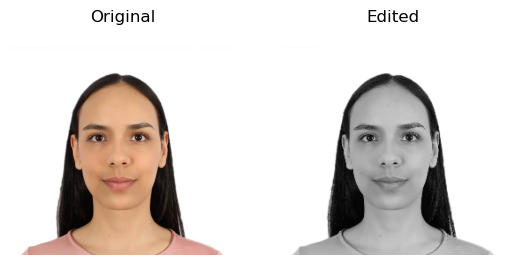

In [431]:
# Create the figure
fig, axs = plt.subplots(1, 2)

# Plot the original image
axs[0].imshow(cv2.cvtColor(my_original_face, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

# Plot the edited image
axs[1].imshow(my_edited_face, cmap='gray')
axs[1].set_title('Edited')
axs[1].axis('off')

# Show the figure
plt.show()

In [432]:
# Get the list of file names in the directory 'images'
images = os.listdir('Fotos ML2')
print(f'There are {len(images)} images in the folder')
faces = []

# Read the images and resize them
for i in images:
    image_path = os.path.join('Fotos ML2', i)
    img = cv2.imread(image_path)

    if img is not None:
        img_resized = cv2.resize(img, (256, 256))
        img_resized = np.uint8(img_resized)
        faces.append(img_resized)

There are 25 images in the folder


libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


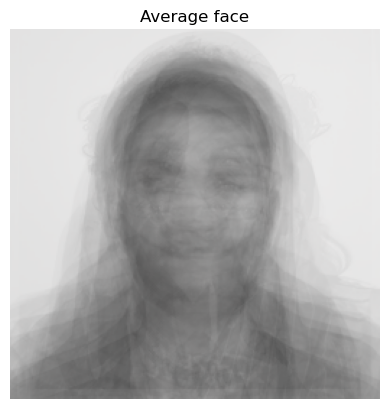

In [433]:
# Convert the list to a numpy array
faces_array = np.array(faces)

# Calculate the average face of the group
average_face = np.mean(faces_array, axis=0)
average_face = np.uint8(average_face)

# Show the average face image
plt.imshow(average_face)
plt.title('Average face')
plt.axis('off')
plt.show()

In [434]:
# Adjusting channels
average_face = cv2.cvtColor(average_face, cv2.COLOR_BGR2GRAY)

In [435]:
# Calculate the distance between my_face and the average_face
mse = np.mean((my_edited_face - average_face) ** 2)                             # Mean Squared Error
mad = round(np.mean(np.abs(my_edited_face - average_face)), 3)                  # Mean absolute difference
euclidean_distance = np.linalg.norm(my_edited_face - average_face)              # Euclidian distance
manhattan_distance = round(np.sum(np.abs(my_edited_face - average_face)), 3)    # Manhattan distance

# Printig the results
print("\n" + "==" * 7 + " Distances " + "==" * 7)
print("1. Mean Squared Error:",             mse)
print("2. Mean absolute difference:",       mad)
print("3. Manhattan distance:" ,            manhattan_distance)
print("4. Euclidian distance:" ,            euclidean_distance)



============== Distances ==============
1. Mean Squared Error: 119.3214111328125
2. Mean absolute difference: 67.503
3. Manhattan distance: 4423896
4. Euclidian distance: 21940.459247700353


1. **Mean Squared Error:** is a measure of the total amount of error between the two images. A lower MSE indicates a smaller difference between the images.

2. **Mean Absolute Difference (MAD):** It's the average absolute difference between pixel values across images. It helps quantify the overall discrepancy between images, *regardless of their direction*. Higher MAD suggests greater dissimilarity, while lower MAD indicates higher similarity. For example, my photo's pixels differ by an average of about 66,745 units from the image's pixels.

3. **Manhattan distance:** It measures how much images differ in terms of their pixel values. It has no defined range, and its value depends on the magnitude of differences in pixel values between the images being compared. Manhattan distance is useful when the difference in one dimension is more significant than in another, or when dimensions are independent.

4. **Euclidean distance:** It's a measure of geometric distance in a multidimensional feature space. The higher the value of this measure, the greater the discrepancy between images in terms of Euclidean distance. The Euclidean distance between images in this feature space is approximately 21722.938 units. *Euclidean distance considers both the magnitude and direction* of differences between images.

*Which one is the best criteria?*

# 3. The unsupervised Python package

In [436]:
# See unsupervised folder

from unsupervised.dim_red import my_pca
from unsupervised.dim_red import my_svd
from unsupervised.dim_red import naty_tsne

PCA
* https://github.com/rushter/MLAlgorithms/blob/master/mla/pca.py 
* https://github.com/patchy631/machine-learning/blob/main/ml_from_scratch/PCA_from_scratch.ipynb
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA 


TSNE
https://github.com/rushter/MLAlgorithms/blob/master/mla/tsne.py 

SVD
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html 

- Fit_transform to training set: both fit a transformation model to the training data and apply the learned transformation to the same data.

- Transform: apply the learned transformation from the training data to the test set.

# 4. Apply SVD over the picture of your face

In [437]:
# Apply Singular Value Decomposition (SVD) using the unsupervised package
svd_instance = my_svd.SVD()

# Fit the SVD model to the data
U, S, Vt = svd_instance.fit(my_edited_face)

# Information
print("\n" + "==" * 7 + " Matrix decomposition " + "==" * 7)
print("Dimension of the matrix of left singular vectors:", U.shape)
print("Dimension of the matrix of diagonal values:", S.shape)
print("Dimension of the matrix of right singular vectors:", Vt.shape)


============== Matrix decomposition ==============
Dimension of the matrix of left singular vectors: (256, 256)
Dimension of the matrix of diagonal values: (256,)
Dimension of the matrix of right singular vectors: (256, 256)


MSE with 1 values: 2182.770119845861
MSE with 6 values: -2.0205206199455468
MSE with 11 values: -0.0184090274586296
MSE with 16 values: -0.0007614716334019833
MSE with 21 values: 0.00011862795323201031
MSE with 26 values: 0.00022064405620950047
MSE with 31 values: 2.6444559971414432e-05
MSE with 36 values: 1.2427436933998932e-05
MSE with 41 values: 9.51070318245341e-06


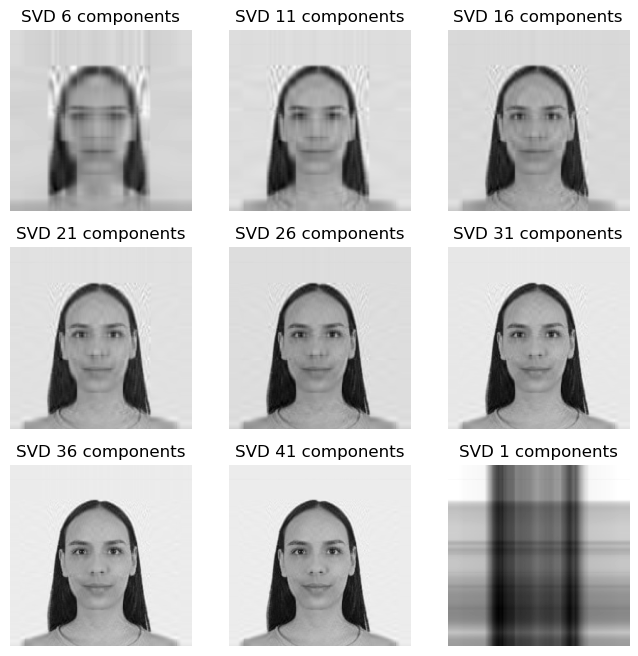

In [438]:
# Define the maximum allowable MSE to consider it zero
max_mse = 0.00001  

# Initialize variables
i = 1
mse_values = []

# Set up the figure
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

# Start while loop
while True:
    # Reconstruct the image using i components
    reconstructed_img = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])

    # Plot the reconstructed image
    ax = axs.flatten()[i//5 - 1]                    # Adjusting index for subplot
    ax.imshow(reconstructed_img, cmap='gray')
    ax.set_title(f'SVD {i} components')
    ax.axis('off')

    # Compute the MSE between the original and reconstructed images
    mse = np.mean((my_edited_face - reconstructed_img) ** 2)
    mse_values.append(mse)

    # Print the MSE
    print(f'MSE with {i} values: {mse}')

    # Check if the absolute value of the MSE is close to zero
    if abs(mse) < max_mse:
        break

    # Increment i by 5 for the next iteration
    i += 5

plt.show()

- Now I have **31** vectors and not 256 and still recognized the image.

- Why I have Vt.T in svd module?

- Negative MSE values can occur due to various reasons, such as numerical precision issues, errors in the calculation, or inconsistencies in the data. In most cases, MSE should be non-negative since it measures the average squared difference between the original and reconstructed values. However, if there are inaccuracies or inconsistencies in the data or the calculation process, it's possible to get negative MSE values.

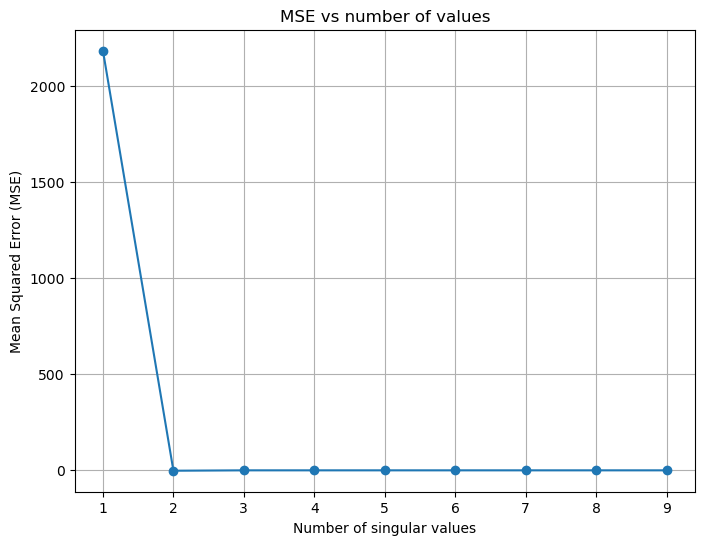

In [439]:
# Plot RMSE vs number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-')
plt.title('MSE vs number of values')
plt.xlabel('Number of singular values')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

By using more singular values, we can reconstruct the image with greater accuracy.To determine the point at which the image is reproduced adequately, we could visualize the reconstructed image using different quantities of singular values or calculate the distance between de reconstructed and original image.

# 5. Train a naive logistic regression on raw MNIST images

In [440]:
# Load the dataset
digits = datasets.load_digits()

# Filter the dataset to only include digits 0 and 8
filters = (digits.target == 0) | (digits.target == 8)
X = digits.images[filters]
y = digits.target[filters]

# Data set description
print("Number of 0:", np.sum(y == 0))
print("Number of 8:", np.sum(y == 8))

Number of 0: 178
Number of 8: 174


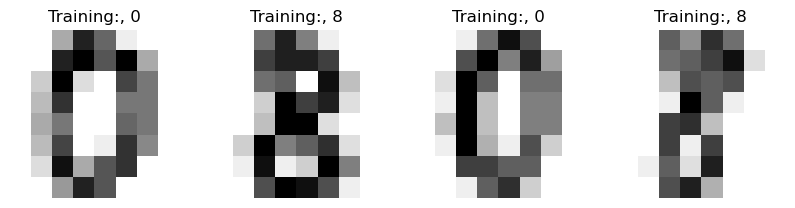

In [441]:
# Preview some images
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'Training:, {label}' )

In [442]:
# Flatten the images
X = X.reshape((len(X), -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Initialize the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the value of the digit on the test subset
y_pred = logistic_regression.predict(X_test)

# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)

print(
    '========================================\n'
    f"Classification report for classifier:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Accuracy of the logistic regression model: 1.0
Classification report for classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           8       1.00      1.00      1.00        53

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106




# 6. Now, apply dimensionality reduction using all your algorithms

In [443]:
# Data in training and test sets
print('\n'+"==" * 4 + " Original training set dimensions " + "==" * 4)
print("Number of images in training set:", X_train.shape[0])
print("Number of features (pixels) in training set:", X_train.shape[1])

print('\n'+"==" * 4 + " Original test set dimensions " + "==" * 4)
print("Number of samples in test set:", X_test.shape[0])
print("Number of features (pixels) in test set:", X_test.shape[1])


======== Original training set dimensions ========
Number of images in training set: 246
Number of features (pixels) in training set: 64

======== Original test set dimensions ========
Number of samples in test set: 106
Number of features (pixels) in test set: 64


In [444]:
from unsupervised.dim_red.my_pca import PCA

# Apply SVD using the unsupervised package
pca = PCA(n_components=2)
X_my_pca_train = pca.fit_transform(X_train)
X_my_pca_test = pca.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_my_pca_train, y_train)
y_my_pred_pca = logistic_regression.predict(X_my_pca_test)
accuracy_my_pca = accuracy_score(y_test, y_my_pred_pca)

In [445]:
from unsupervised.dim_red.my_svd import SVD

# Apply SVD using the unsupervised package
svd = SVD(n_components=2)
X_my_svd_train = svd.fit_transform(X_train)
X_my_svd_test = svd.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_my_svd_train, y_train)
y_my_pred_svd = logistic_regression.predict(X_my_svd_test)
accuracy_my_svd = accuracy_score(y_test, y_my_pred_svd)

In [446]:
# Import implemented packages 
from unsupervised.dim_red.naty_tsne import TSNE

tsne = TSNE(n_dimensions=2)

# Apply TSNE to the X_train matrix using the unsupervised package
X_my_tsne_train = tsne.fit(X_train)
X_my_tsne_train = tsne.transform(X_train,1000)

# Apply TSNE to the X_test matrix using the unsupervised package
X_my_tsne_test = tsne.fit(X_test)
X_my_tsne_test = tsne.transform(X_test,1000)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_my_tsne_train, y_train)
y_my_pred_tsne = logistic_regression.predict(X_my_tsne_test)
accuracy_my_tsne = accuracy_score(y_test, y_my_pred_tsne)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 3.0166009697484144
Iteration 50: Value of Cost Function is 3.127954360328427


Iteration 100: Value of Cost Function is 3.1332158469035774
Iteration 150: Value of Cost Function is 3.118618573831479
Iteration 200: Value of Cost Function is 3.160699826183664
Iteration 250: Value of Cost Function is 3.131534903531889
Iteration 300: Value of Cost Function is 0.7590478213835419
Iteration 350: Value of Cost Function is 0.7485305201503456
Iteration 400: Value of Cost Function is 0.7453392477823018
Iteration 450: Value of Cost Function is 0.7436526253032505
Iteration 500: Value of Cost Function is 0.7424050695351588
Iteration 550: Value of Cost Function is 0.7414175624182806
Iteration 600: Value of Cost Function is 0.7407100144695227
Iteration 650: Value of Cost Function is 0.7402100059011304
Iteration 700: Value of Cost Function is 0.7398339868644517
Iteration 750: Value of Cost Function is 0.7395372800643686
Iteration 800: Value of Cost Function is 0.7392957516553312
Iteration 850: Value of Cost Function is 0.7390947510925017
Iteration 900: Value of Cost Function is 0.

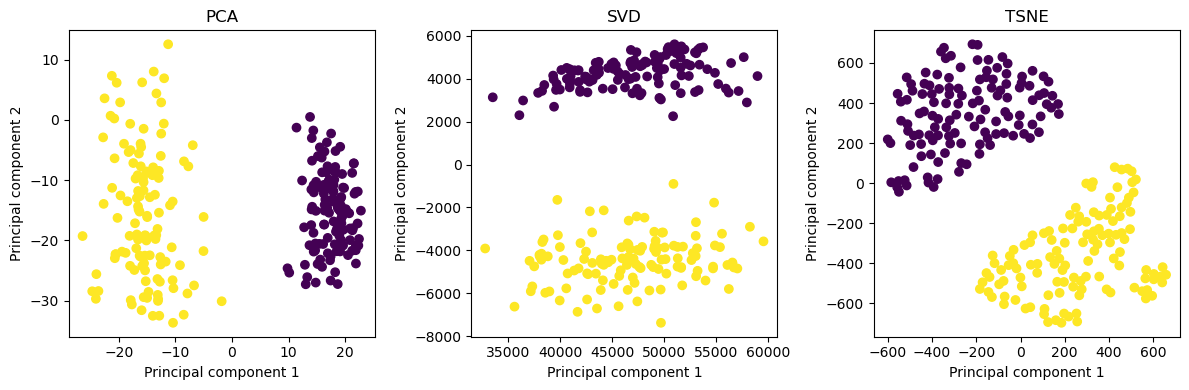

In [447]:
# Create a new figure with specified size
plt.figure(figsize=(12, 4))

# Plot the results for PCA
plt.subplot(1, 3, 1)
plt.scatter(X_my_pca_train[:, 0], X_my_pca_train[:, 1], c=y_train)
plt.title('PCA')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Plot the results for SVD
plt.subplot(1, 3, 2)
plt.scatter(X_my_svd_train[:, 0], X_my_svd_train[:, 1], c=y_train)
plt.title('SVD')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Plot the results for TSNE
plt.subplot(1, 3, 3)
plt.scatter(X_my_tsne_train[:, 0], X_my_tsne_train[:, 1], c=y_train)
plt.title('TSNE')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Display the figure
plt.tight_layout() 
plt.show()

In [448]:
# Print the results
print("==" * 4 + " Accuracy using reduced charecteristics " + "==" * 4)
print("PCA",     accuracy_my_pca)
print("SVD:",    accuracy_my_svd)
print("t-SNE:",  accuracy_my_tsne)

======== Accuracy using reduced charecteristics ========
PCA 0.9905660377358491
SVD: 0.9905660377358491
t-SNE: 0.6037735849056604


# 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn

In [449]:
from sklearn.decomposition import PCA

# Perform dimensionality reduction with PCA
pca = PCA(n_components = 2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_pca_train, y_train)
y_pred_pca = logistic_regression.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [450]:
from sklearn.decomposition import TruncatedSVD

# Perform dimensionality reduction with SVD
svd = TruncatedSVD(n_components=2)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_svd_train, y_train)
y_pred_svd = logistic_regression.predict(X_svd_test)
accuracy_svd = accuracy_score(y_test, y_pred_svd)

In [451]:
from sklearn.manifold import TSNE

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_tsne_train, y_train)
y_pred_tsne = logistic_regression.predict(X_tsne_test)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

In [452]:
# Print the results
print("==" * 4 + " Accuracy using reduced charecteristics " + "==" * 4)
print("PCA",     accuracy_pca)
print("SVD:",    accuracy_svd)
print("t-SNE:",  accuracy_tsne)

======== Accuracy using reduced charecteristics ========
PCA 0.9905660377358491
SVD: 0.9905660377358491
t-SNE: 0.9716981132075472


- t-SNE had the worst performance using the unsupervised and also the sklearn package.

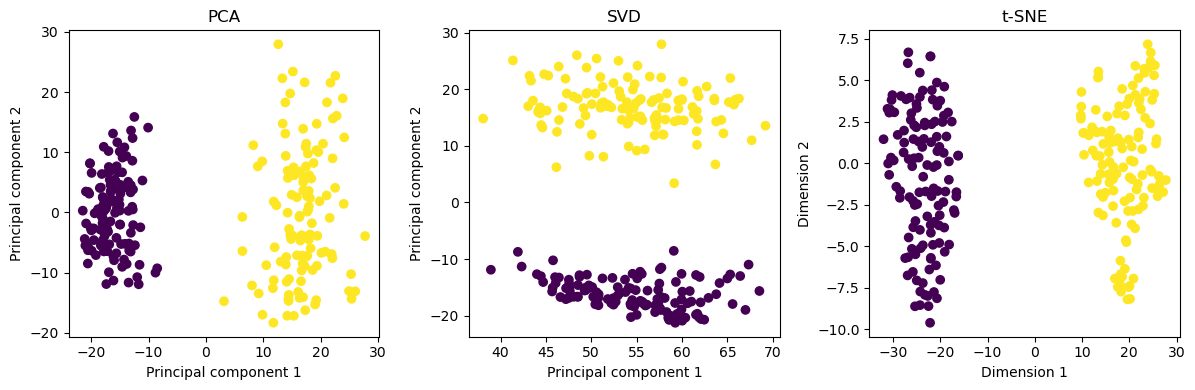

In [453]:
# Create a new figure with specified size
plt.figure(figsize=(12, 4))

# Plot the results for PCA
plt.subplot(1, 3, 1)
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_train)
plt.title('PCA')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Plot the results for SVD
plt.subplot(1, 3, 2)
plt.scatter(X_svd_train[:, 0], X_svd_train[:, 1], c=y_train)
plt.title('SVD')  
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# Plot the results for t-SNE
plt.subplot(1, 3, 3)
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_train)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Display the figure
plt.tight_layout() 
plt.show()

*how to plot the vectors?*

**Analysis**
- t-SNE take 4 times more than the other two algorithms, because it is an iterative process.
- I can visually inspect how the data is separated in the reduced feature space. Additionally, you can compare the performance of the model trained with the reduced datasets to the performance of the model trained with the original dataset to see if dimensionality reduction impacts the model's performance.

- *How different are these results from those of your implementation? Why?*

- This is a 2D dimensions representation of the characteristic of the 8x8 images
- *x* and *y* axes represent the two new features generated by each dimensionality reduction algorithm
- It is more evident the separation using t-SNE algorithm

For PCA and SVD:
- The x-axis represents the first principal component.
- The y-axis represents the second principal component.
- The scale on these axes depends on the values of the principal components. Each point in the plot represents a sample (a row) from the training dataset, projected onto the space of the first two principal components.

**Variance:** 
- PCA and t-SNE: Most of the variance is representated vertically
- SVD: Most of the variance is representated horizontally

For t-SNE:
- The x-axis represents the first dimension of the data transformed by t-SNE.
- The y-axis represents the second dimension of the data transformed by t-SNE.
- The scale on these axes doesn't correspond to any specific measure in the original data. t-SNE is a nonlinear dimensionality reduction technique that focuses on preserving the local structure of the data, so the units on these axes don't have a direct physical meaning. The points in the plot represent samples from the training dataset, projected into the two-dimensional space created by t-SNE.

**Componentes direction**

- PCA attempts to find orthogonal axes in the data that maximize the variance. As a result, the principal components (PCs) can capture the direction of maximum variance in the data. 

- t-SNE is a nonlinear dimensionality reduction technique that focuses on preserving the local structure of the data. It tries to represent the similarity between data points in a lower-dimensional space. This often results in clusters being grouped together more compactly compared to PCA.

- SVD decomposes the data matrix into three matrices: U, S, and Vt. The rows of the V matrix represent the principal directions of the data. Therefore, the clusters in SVD plots may appear horizontally aligned because each row of the V matrix represents a principal direction capturing the variance in the data.

# 8 What strategies do you know...?

In [458]:
# See my_robust_pca.py module

from unsupervised.dim_red.my_robust_pca import RPCA

**Strategie 1. Mean centering:** substracting the mean of each feature (column) from the data. This centers the data around 0.


**Strategie 2. Solver flexibility:** user can choose between normal PCA descomposition or SVD for rectangular matrix.

**Strategie 3. Data standarization:** data preprocessing.

In [455]:
# Using solver = 'eig'

# Apply SVD using the unsupervised package
rpca = RPCA(n_components=2, solver = 'eig')
X_my_rpca_train = rpca.fit_transform(X_train)
X_my_rpca_test = rpca.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_my_rpca_train, y_train)
y_my_pred_rpca = logistic_regression.predict(X_my_rpca_test)
accuracy_my_rpca = accuracy_score(y_test, y_my_pred_rpca)
accuracy_my_rpca

0.9905660377358491

In [456]:
# Using solver = 'svd'

# Apply SVD using the unsupervised package
rpca = RPCA(n_components=2, solver = 'svd')
X_my_rpca_train = rpca.fit_transform(X_train)
X_my_rpca_test = rpca.transform(X_test)

# Train a logistic regression model using the reduced datasets
logistic_regression.fit(X_my_rpca_train, y_train)
y_my_pred_rpca = logistic_regression.predict(X_my_rpca_test)
accuracy_my_rpca = accuracy_score(y_test, y_my_pred_rpca)
accuracy_my_rpca

0.9905660377358491

The results are the same

**Other possible strategies:**

- **Subspace Tracking:** For large datasets or streaming data, consider using incremental PCA or online PCA, which update the principal components iteratively as new data arrives. This approach allows for more efficient computation and adaptation to changes in the data distribution over time.

- **Cross-validation:** Use cross-validation to determine the optimal number of principal components to retain. This helps avoid overfitting and ensures that the selected components generalize well to unseen data.


# 9 and 10

In [457]:
# See PDF file. Disclaimer: this content is in Spanish.

# References

- Fastai's Numerical Linear Algebra Notebook on Background Removal with Robust PCA: [Link](https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb)

- NumPy Official Documentation (Accessed: 2024). Available at: [Link](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint)

- Pandas Official Documentation (Accessed: 2024). Available at: [Link](https://pandas.pydata.org/docs/user_guide/basics.html#dtypes)

- NumPy Linear Algebra Official Documentation (Accessed: 2024). Available at: [Link](https://numpy.org/doc/stable/reference/routines.linalg.html)

- Linear Algebra for Machine Learning Course (Accessed: 2024) - Plazti. Available at: [Link](https://platzi.com/cursos/algebra-ml/?ada_source=conversation)

- Youtube. Principal Component Analysis (PCA) Analysis - Video (Accessed: 2024). Available at: [Link](https://www.youtube.com/watch?v=AniiwysJ-2Y)

# To do

- Implement functions to avoid code repeating
- Improve average face centering all the images (aligning the eyes)
- Learn more about T-SNE implementation
- MNIST: map 0 as 0, 8 as 1
- Use StandarScaler in all modules as data preparation

# Questions
- Is the trace of a matrix is equal to the sum of its eigenvalues?
- Which one is the best distance criteria?